In [138]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [139]:
df=pd.read_csv("UBER.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
...,...,...,...,...,...,...,...
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600


In [140]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
5,2023-01-09,27.299999,28.049999,27.150000,27.400000,27.400000,24962100
6,2023-01-10,27.400000,28.250000,27.150000,28.040001,28.040001,15413700
7,2023-01-11,28.240000,28.520000,27.920000,28.350000,28.350000,15421700
8,2023-01-12,28.850000,29.184999,28.200001,29.030001,29.030001,17513400
9,2023-01-13,28.680000,29.500000,28.660000,29.440001,29.440001,16940700


In [141]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
241,2023-12-15,62.160000,63.529999,61.410000,61.860001,61.860001,364231800
242,2023-12-18,62.009998,62.490002,61.330002,61.730000,61.730000,28614000
243,2023-12-19,61.880001,62.700001,61.689999,62.119999,62.119999,26813800
244,2023-12-20,61.490002,62.279999,60.619999,60.680000,60.680000,28286100
245,2023-12-21,61.240002,61.759998,60.825001,61.459999,61.459999,19999600
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600
250,2023-12-29,62.360001,63.139999,61.299999,61.570000,61.570000,21602500


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [143]:
df["Date"]=pd.to_datetime(df["Date"])

In [144]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month


In [145]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100,2022,12
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300,2023,1
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000,2023,1
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000,2023,1
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800,2023,1
...,...,...,...,...,...,...,...,...,...
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400,2023,12
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200,2023,12
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000,2023,12
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600,2023,12


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
 7   Year       251 non-null    int64         
 8   Month      251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 17.8 KB


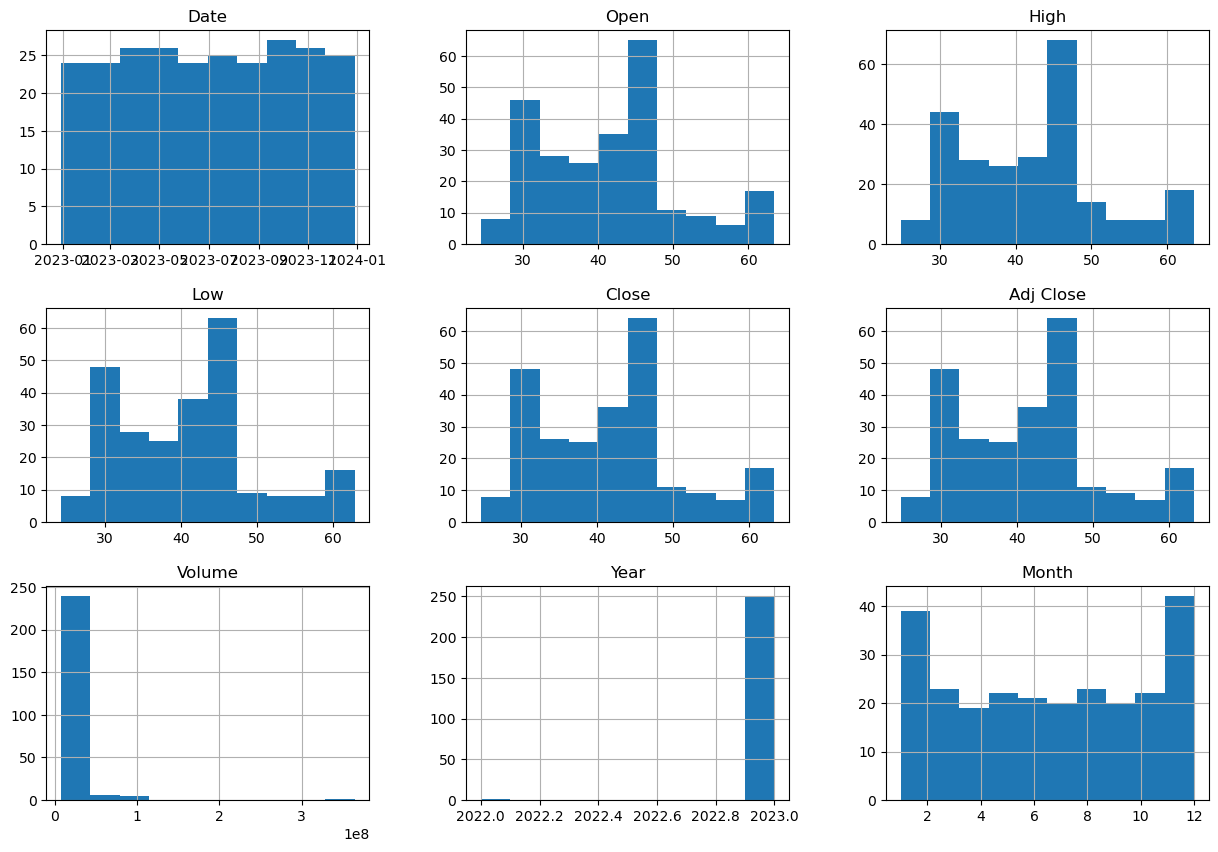

In [147]:
df.hist(figsize=(15,10))

plt.savefig("Trading volume histogram.")

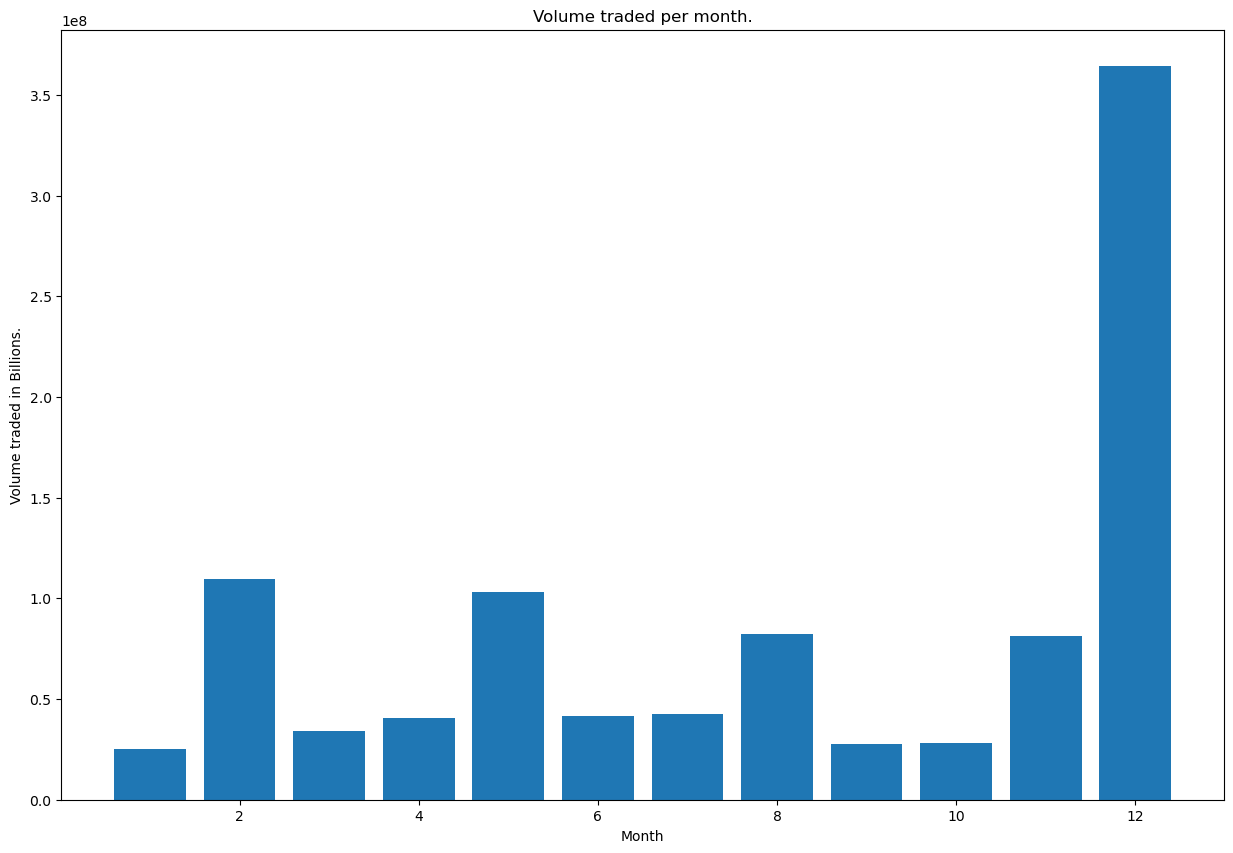

In [148]:
plt.figure(figsize=(15,10))
plt.bar(df["Month"],df["Volume"])
plt.xlabel("Month")
plt.ylabel("Volume traded in Billions.")
plt.title("Volume traded per month.")
plt.savefig("Volume per month.")

plt.show()

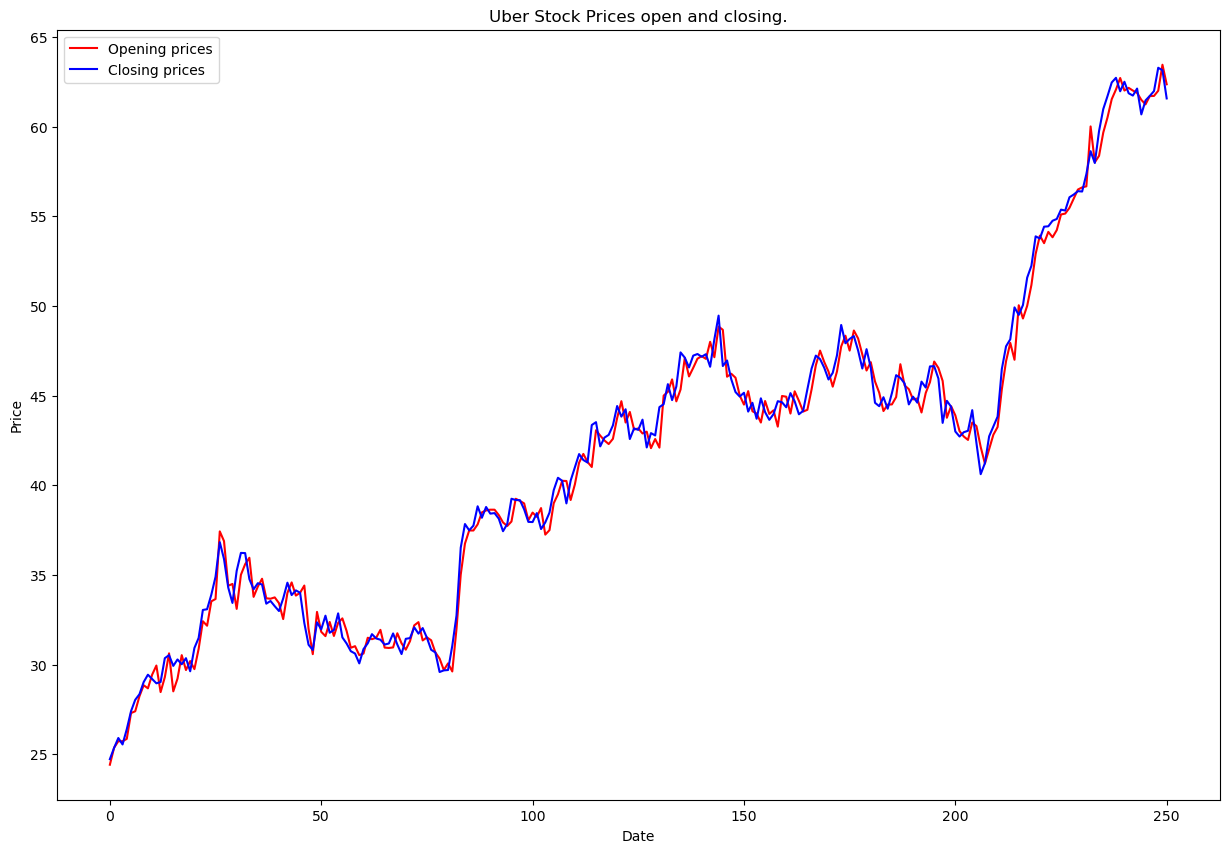

In [149]:
plt.figure(figsize=(15, 10))
plt.title("Uber Stock Prices open and closing.")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["Open"], color="red", label="Opening prices")  
plt.plot(df["Close"], color="Blue", label="Closing prices")
plt.legend()  
plt.savefig("Opening and closing stock")

# plt.show()


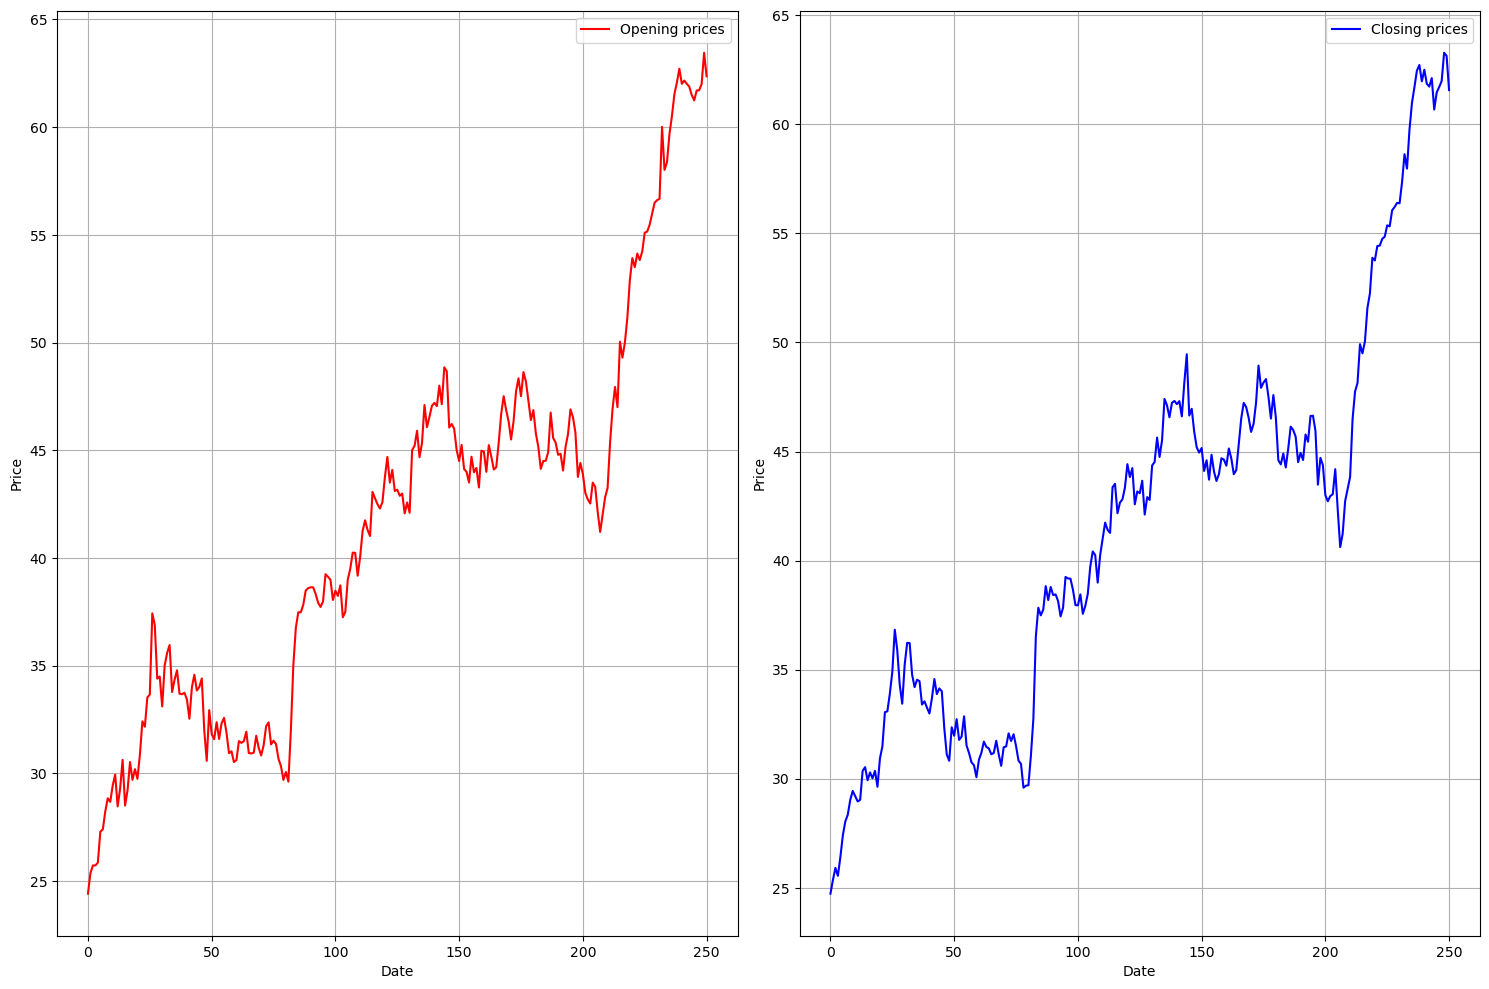

In [150]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(df["Open"], color="red", label="Opening prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(df["Close"], color="Blue", label="Closing prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



looking at the correlation between the features of this dataset:

C:\Users\DELL\AppData\Local\Temp\ipykernel_7972\4180252519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


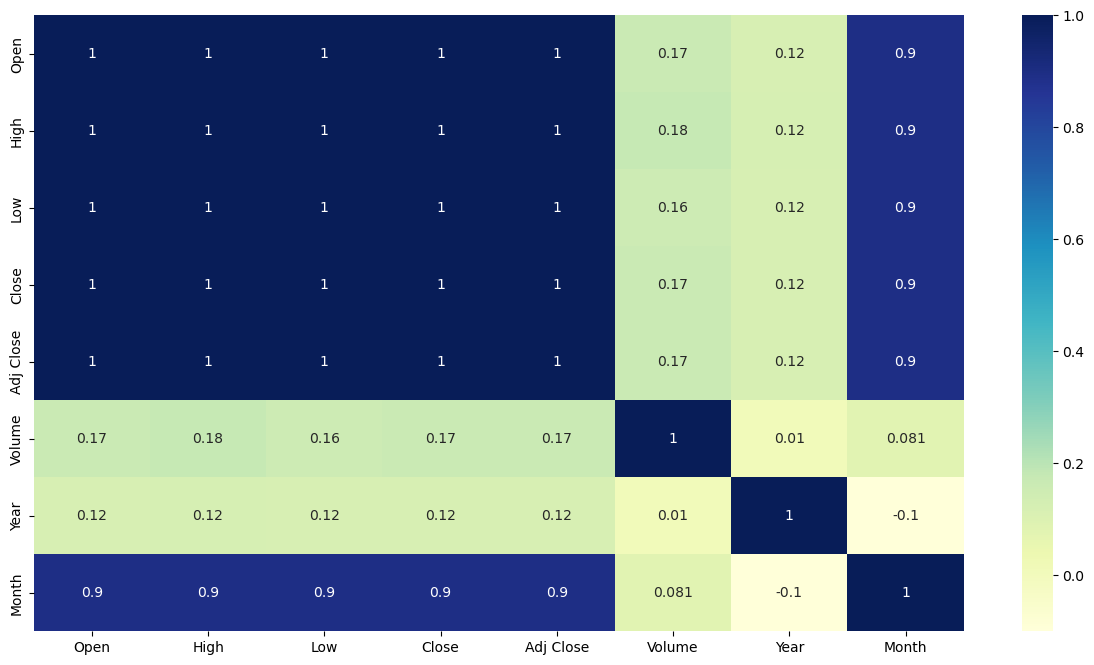

In [151]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

plt.savefig("Correlation matrix")

In [152]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100,2022,12
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300,2023,1
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000,2023,1
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000,2023,1
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800,2023,1
...,...,...,...,...,...,...,...,...,...
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400,2023,12
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200,2023,12
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000,2023,12
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600,2023,12


In [153]:
x=df.drop(["Close","Date"],axis=1)
y=df["Close"]

MSE: 3.0679253566986985e-19


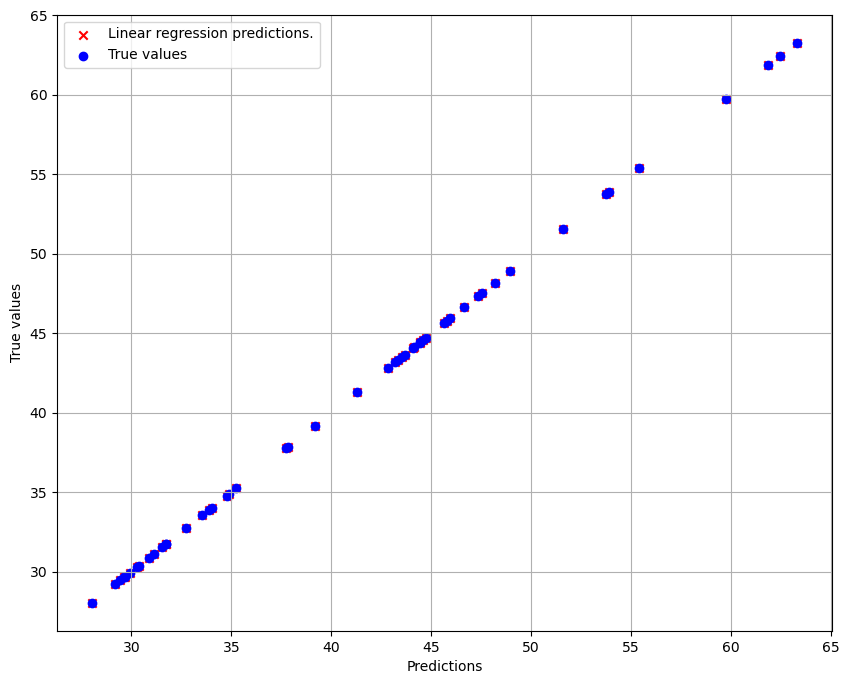

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

mse=mean_squared_error(y_pred,y_test)

print("MSE:",mse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color="red",marker="x",label="Linear regression predictions.")
plt.scatter(y_test,y_test,color="blue",marker="o",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.grid()
plt.savefig("LR model")
plt.show()

MSE: 3.0679253566986985e-19


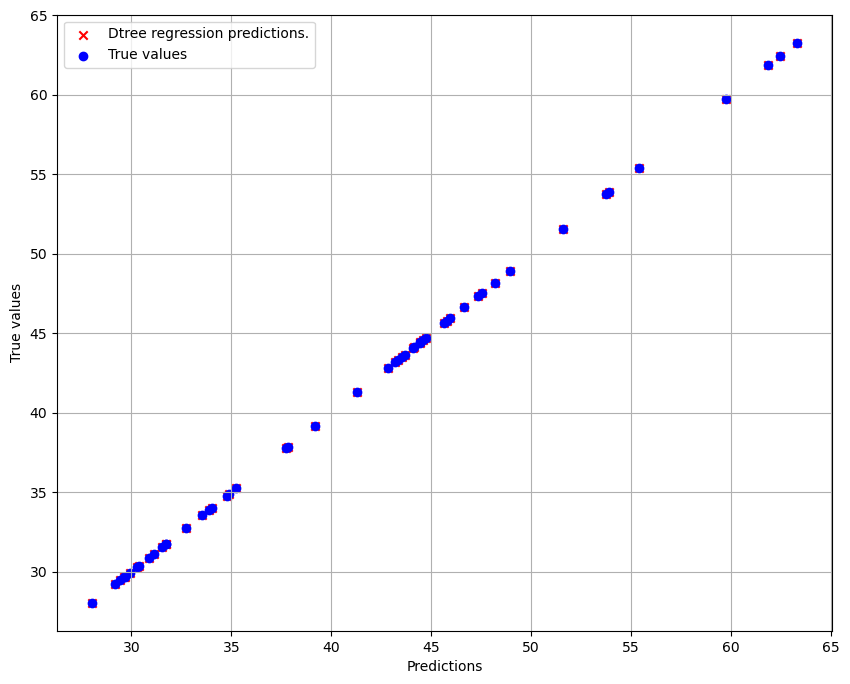

In [155]:
dtree=DecisionTreeRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=5, random_state=42)

dtree.fit(x_train,y_train)
y_dtree_pred=dtree.predict(x_test)

mse=mean_squared_error(y_pred,y_test)

print("MSE:",mse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color="red",marker="x",label="Dtree regression predictions.")
plt.scatter(y_test,y_test,color="blue",marker="o",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.grid()
plt.savefig("Dtree model.")

plt.show()

In [156]:
param_grid={
    "max_depth":[None,5,10,15],
    "min_samples_leaf":[2,4,6],
    "min_samples_split":[1,2,3]
}

dtree=DecisionTreeRegressor(random_state=42)
grid=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")

grid.fit(x_train,y_train)

best_params=grid.best_params_
best_estimator=grid.best_estimator_

In [157]:
best_params

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 1}

In [158]:
best_estimator

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=1, random_state=42)

In [159]:
dtree=DecisionTreeRegressor(min_samples_leaf=2,min_samples_split=1,random_state=42)

dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print("MSE:",mse)

MSE: 0.2852990309819507


With the hyperparameter tuning the model was able to reduce the MSE(Mean squared) from 3.06 to 0.28 and has allowed for better performance.